In [1]:
# Import libraries

import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import keras
import cv2
%matplotlib inline
#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

2023-05-01 17:29:39.227440: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Data processing

data = []
label = []
#path = "./data/train/"
path = "/Users/baonhivu/Dropbox/My Mac (Bao-Nhi’s MacBook Pro)/Desktop/COMP/comp562/Final Project/Sample Data/dogs-vs-cats/train/"
c = 0
d = 0
IMG_SIZE = 32
for file in os.listdir(path):
    img=cv2.imread(path+file)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    img=img.astype('float32')
    if file[:3]=='cat':
        if c==500: continue
        c+=1
        label.append("cat")
    else:
        if d==500: continue
        d+=1
        label.append("dog")
    data.append(img)
data = np.array(data)

In [5]:
# Preprocessing
# Value 0 for cat and 1 for dog
data_label = []
for i in label:
    if i=="cat": data_label.append(0)
    else: data_label.append(1)
data_label = np.array(data_label)

data = data/255.0
reshaped_data = data.reshape(len(data),-1)

# Output
reshaped_data.shape = (1000,3072)

In [7]:
# Standard K-Means

kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape

# Output
kmeans.cluster_centers_.shape = (2,3072)

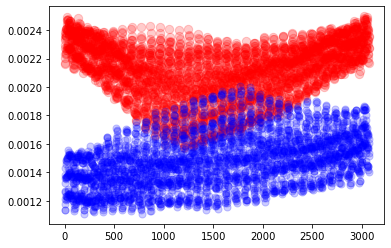

In [8]:
# Scatter plot of centroids

x_data = [i for i in range(3072)]
plt.scatter(x_data,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)

In [10]:
# Mapping the labels

# Mapping labels from cluster to original labels
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label

# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)
print(accuracy_score(predicted_labels,data_label))

0.543
